In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
from scipy.stats import multivariate_normal

# Zadanie
Proszę wygenerować dane tak by 1. i 3. współrzędna były skorelowane a pozostałe nie.
Proszę zwizualizować tą zależność za pomocą 

- sns.pairplot
- sns.heatmap

Genereuje punkty:

In [2]:
n=1000
x1=stats.norm(0,1).rvs(n)
x2=stats.norm(0,1).rvs(n)
x4=stats.norm(0,1).rvs(n)
X=np.stack((x1,x2, 2*x1, x4 ),1)

Rysuje punkty jako pray współrzednych: 

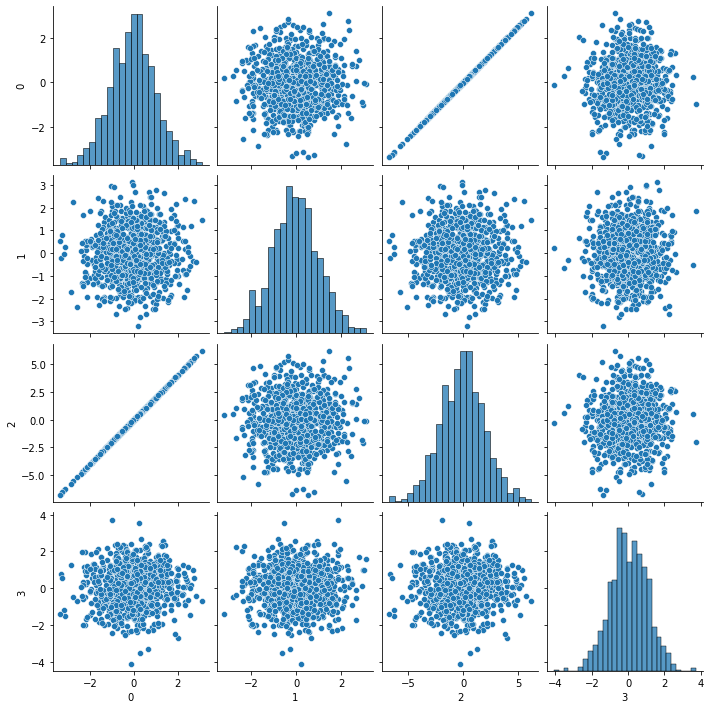

In [3]:
df=pd.DataFrame(X)
sns.pairplot(df)#, kind="reg"
plt.show()

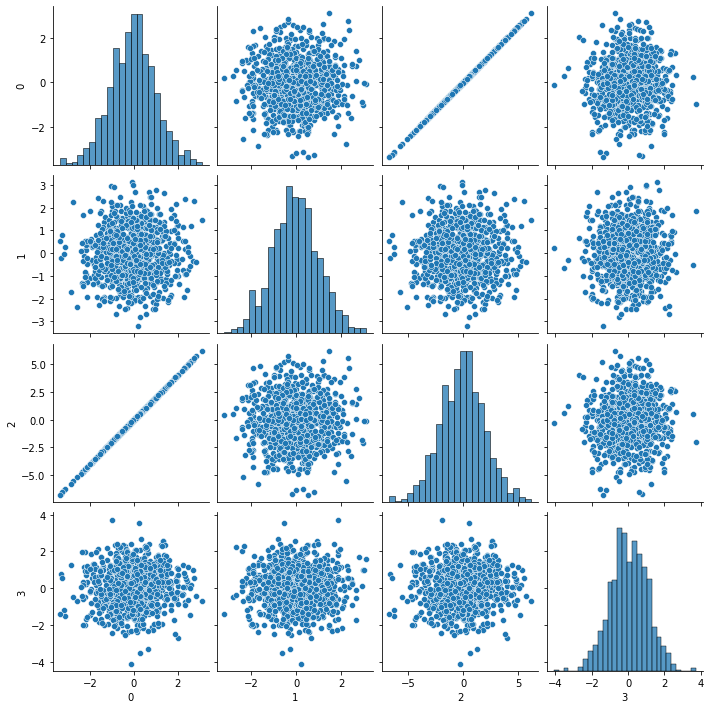

In [4]:
df=pd.DataFrame(X)
sns.pairplot(df)
plt.show()

Rysuję macierz korelacji za pomocą <tt>heatmap</tt>.

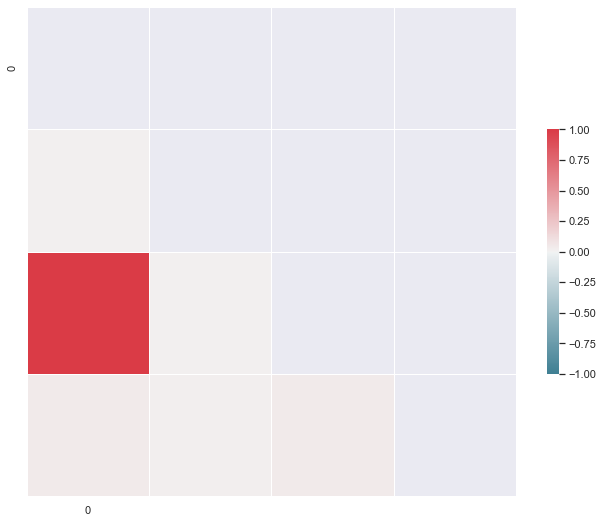

,0,1,2,3
0,1.000000,0.012907,1.000000,0.042539
1,0.012907,1.000000,0.012907,0.016971
2,1.000000,0.012907,1.000000,0.042539
3,0.042539,0.016971,0.042539,1.000000


In [6]:
sns.set(style="darkgrid")

corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1,
            square=True, xticklabels=5, yticklabels=5,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)
plt.show()
corr

# Zadanie
Wygeneruj dane 10. wymiarowe tak by 

- 1 3 5 współrzedna były skorelowane ze sobą dodatnio
- 7 8 współrzedna były skorelowane ze sobą ujemnie
- pozostałe były nieskorelowane


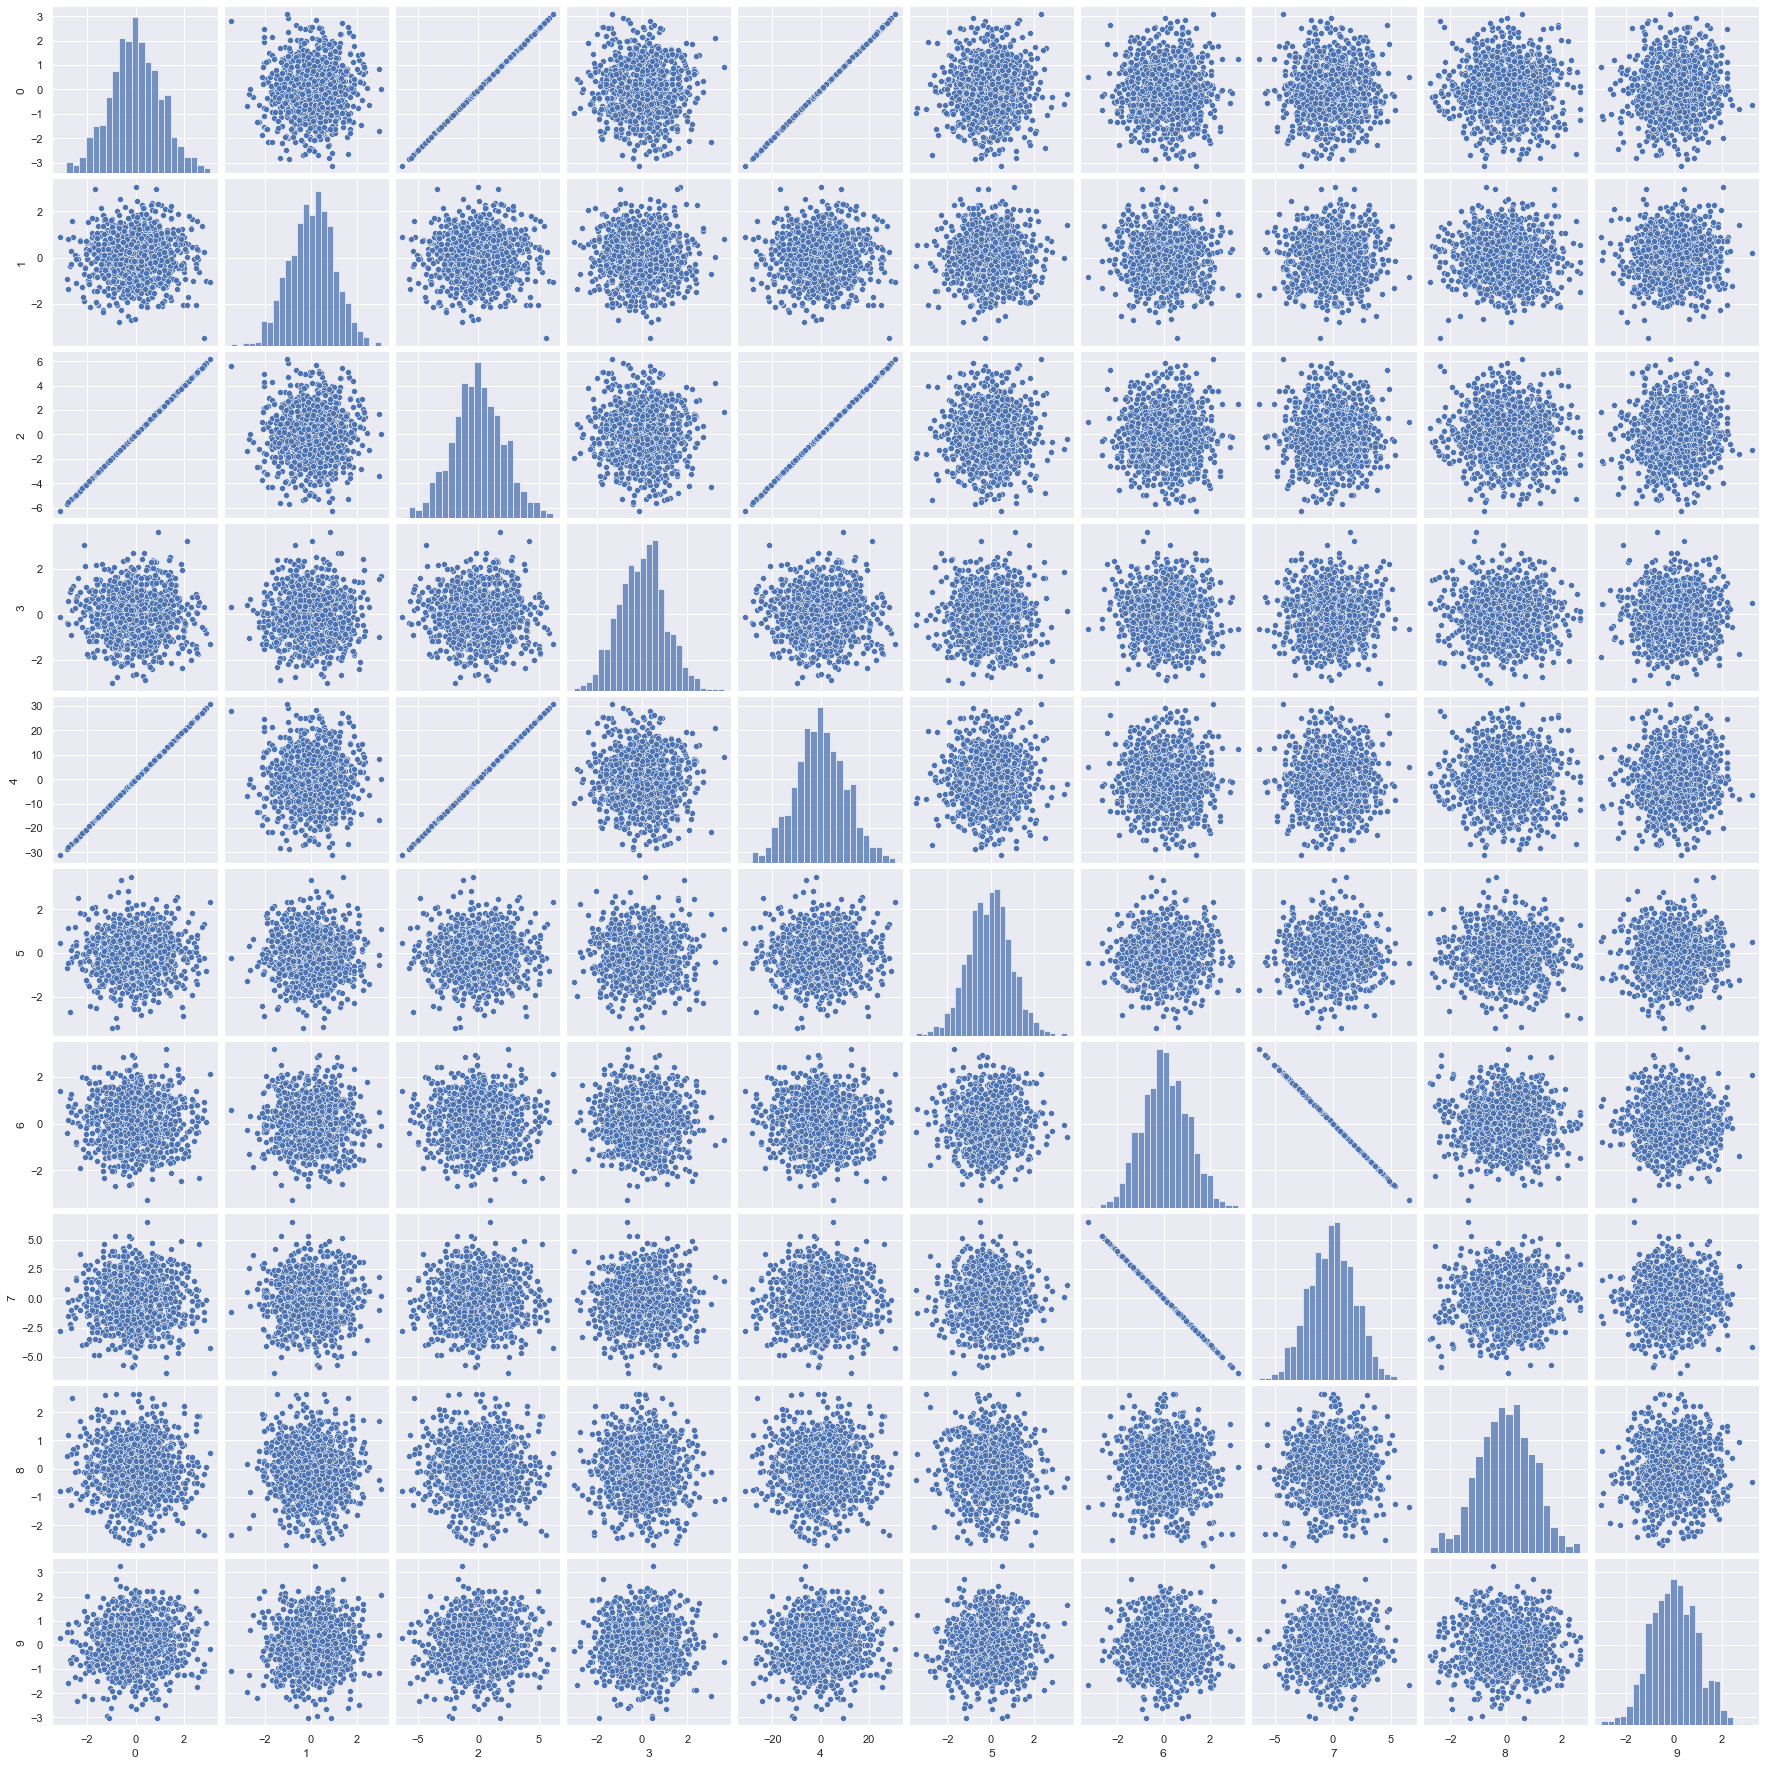

In [7]:
n=1000
x1=stats.norm(0,1).rvs(n)
x2=stats.norm(0,1).rvs(n)
x4=stats.norm(0,1).rvs(n)
x5=stats.norm(0,1).rvs(n)
x6=stats.norm(0,1).rvs(n)
x7=stats.norm(0,1).rvs(n)
x8=stats.norm(0,1).rvs(n)
X=np.stack((x1, x2, 2*x1, x4, 10*x1, x5, x6, -2*x6,x7,x8),1)

df=pd.DataFrame(X)
sns.pairplot(df)#, kind="reg"
plt.show()

# Zad 
Dodaj kilka współrzednych tak by były skorelowanie nieliniowo np. $x^2$
* czy widać jakiś efekt na heat map

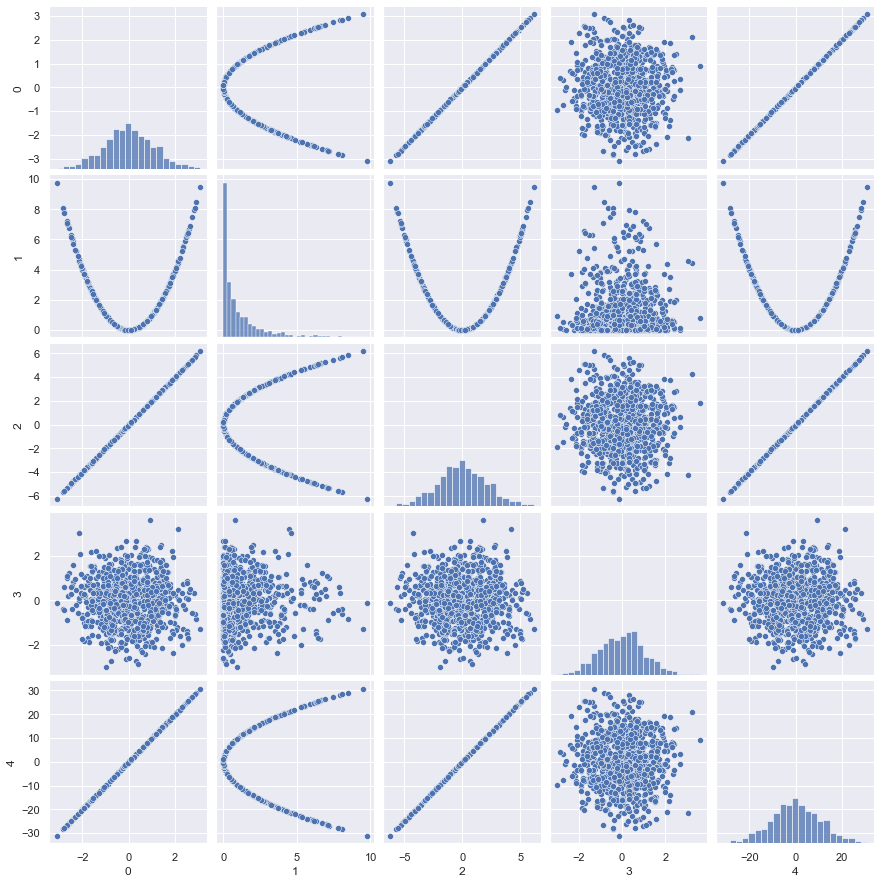

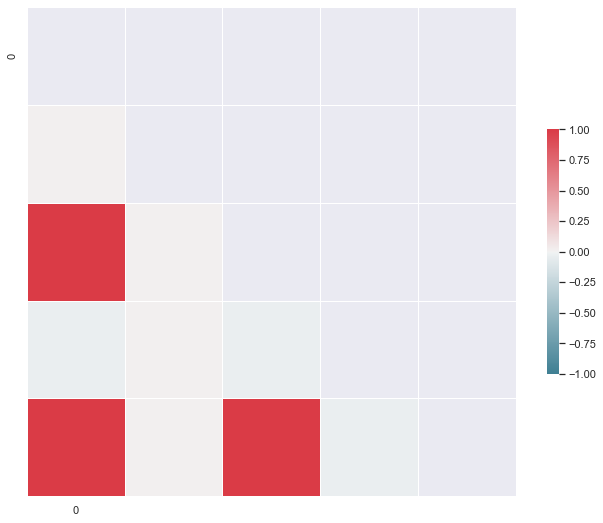

,0,1,2,3,4
0,1.000000,0.013455,1.000000,-0.032841,1.000000
1,0.013455,1.000000,0.013455,0.014683,0.013455
2,1.000000,0.013455,1.000000,-0.032841,1.000000
3,-0.032841,0.014683,-0.032841,1.000000,-0.032841
4,1.000000,0.013455,1.000000,-0.032841,1.000000


In [15]:
X=np.stack((x1, x1**2, 2*x1, x4, 10*x1),1)


df=pd.DataFrame(X)
sns.pairplot(df)#, kind="reg"
plt.show()


sns.set(style="darkgrid")

corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1,
            square=True, xticklabels=5, yticklabels=5,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)
plt.show()
corr

# Zadanie
Wykonaj wykresy
- sns.pairplot
- sns.heatmap

dla poniższego zbioru danych


In [10]:
from sklearn import datasets
boston = datasets.load_boston()
data=boston.data


C:\Users\jakub\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include th

In [21]:
print(boston.DESCR)
df=pd.DataFrame(data)
df

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


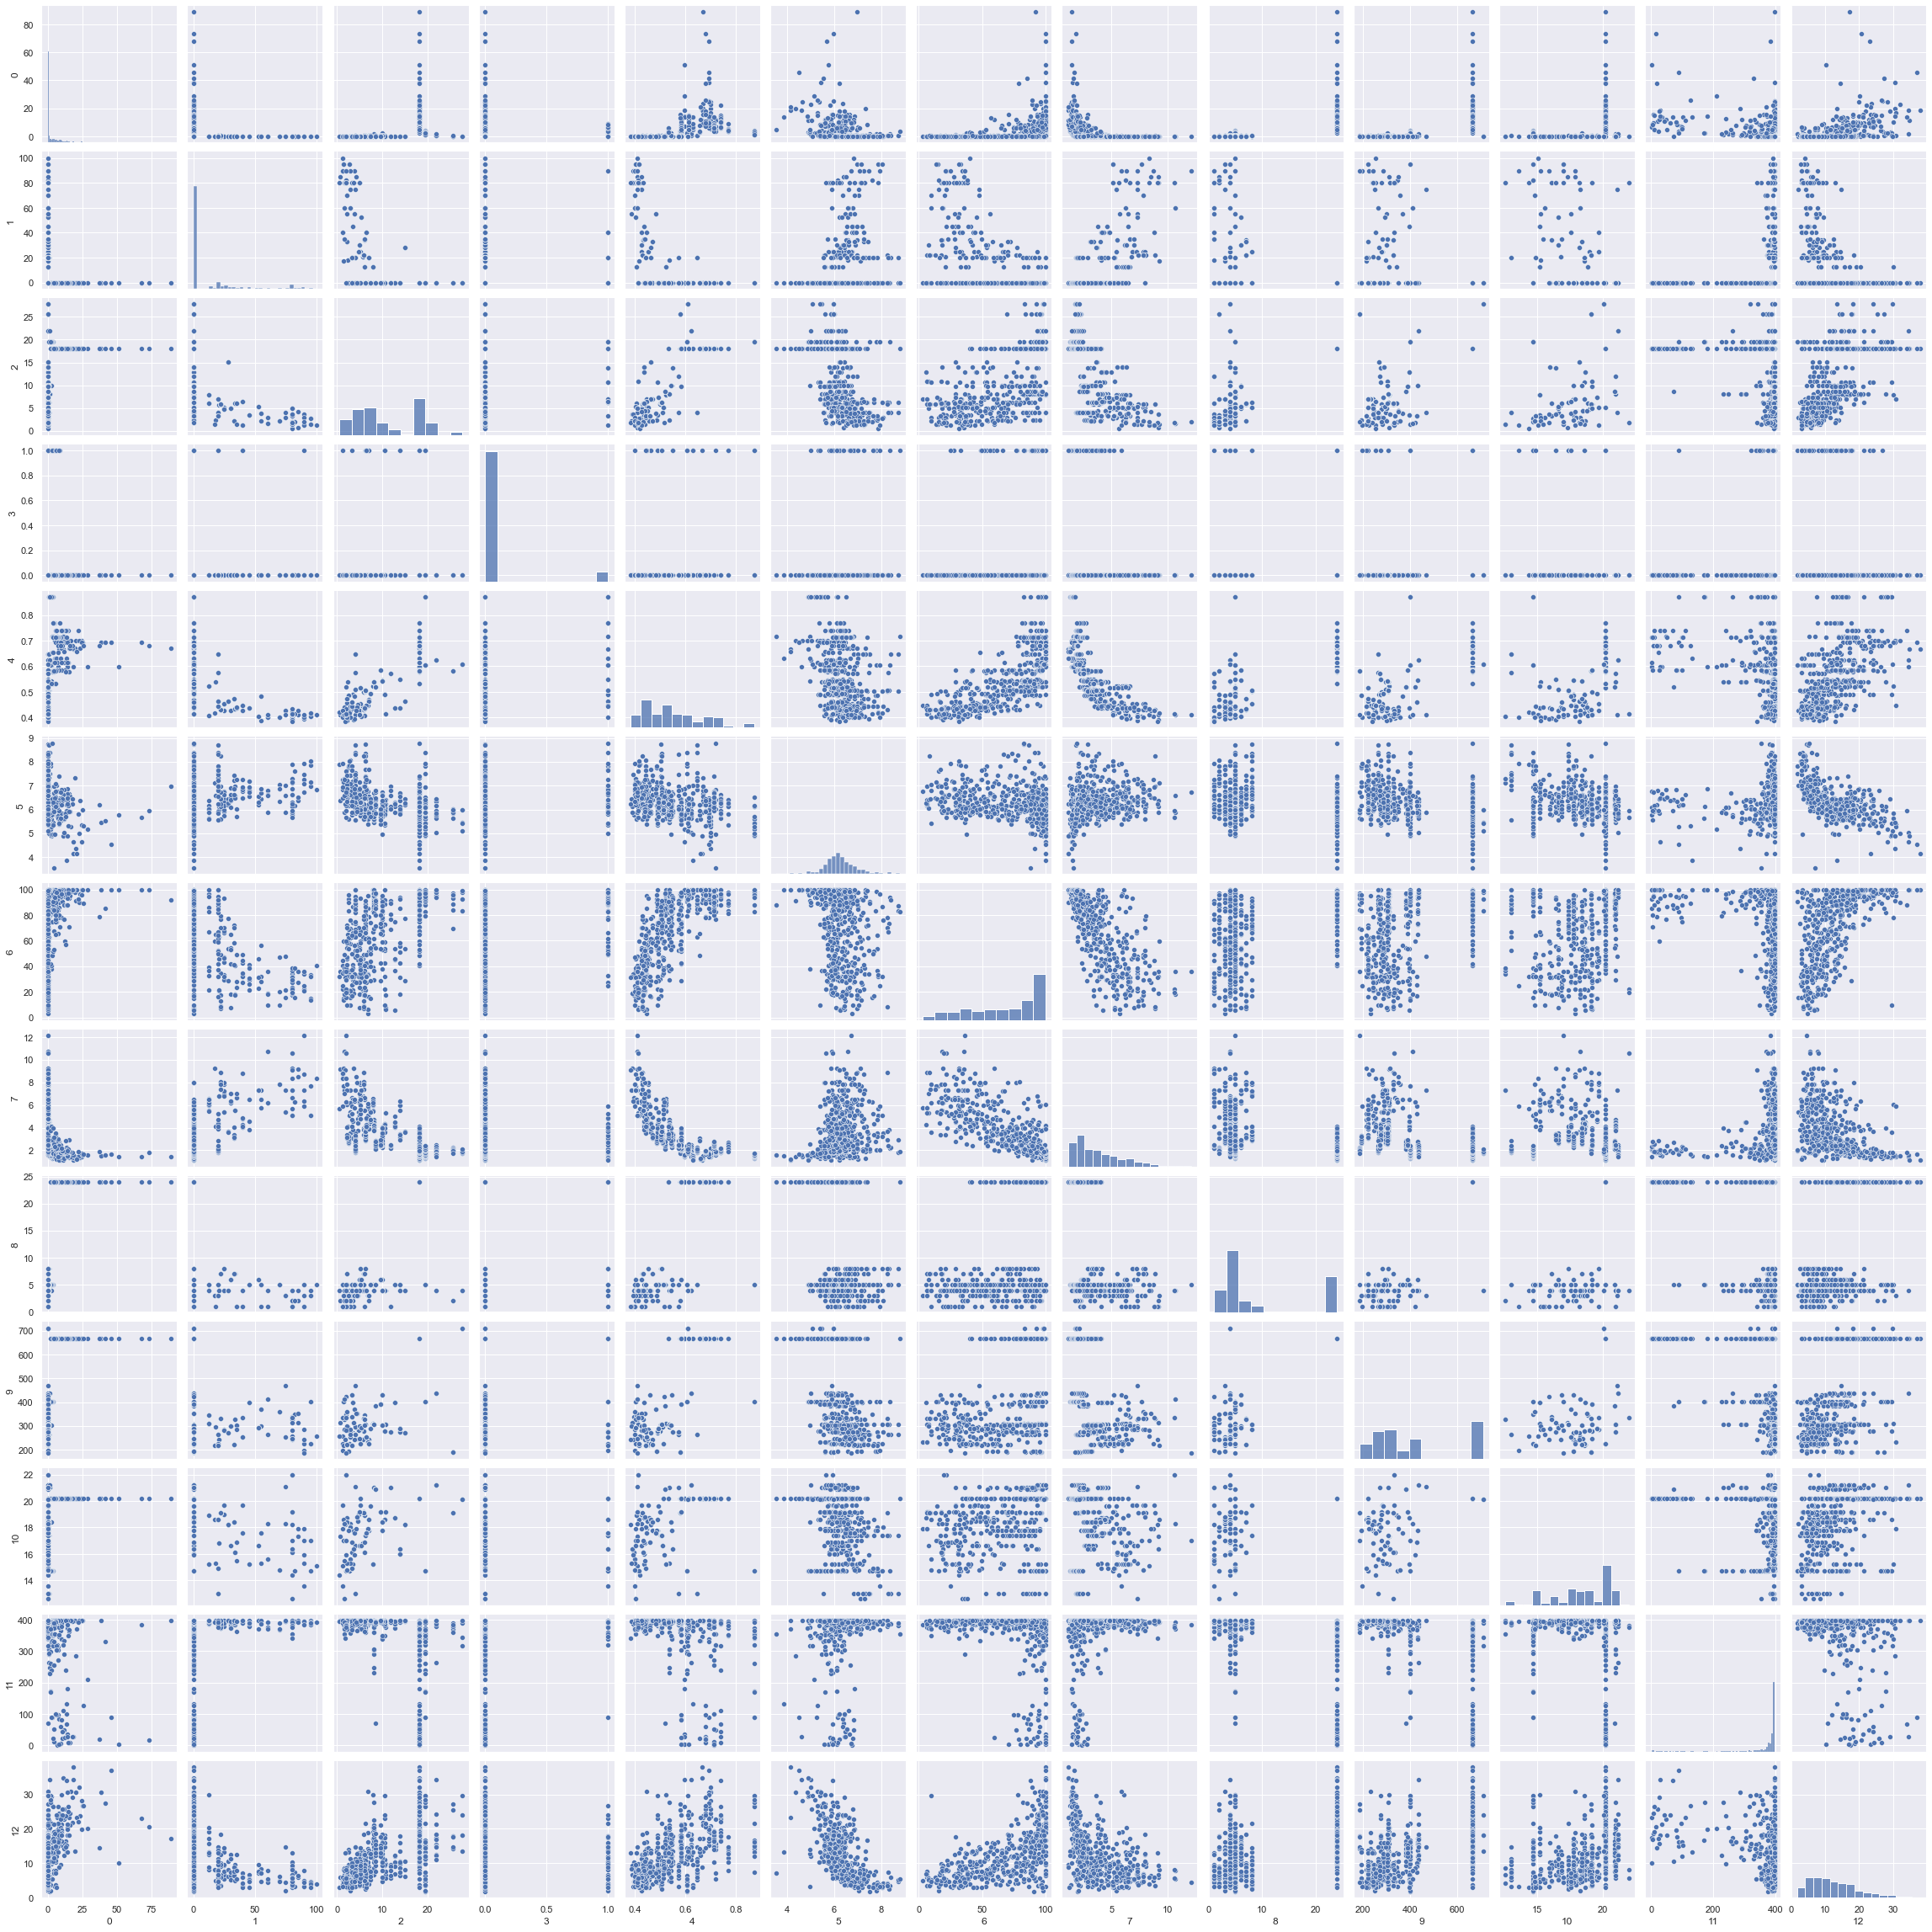

In [11]:
sns.pairplot(df)#, kind="reg"
plt.show()

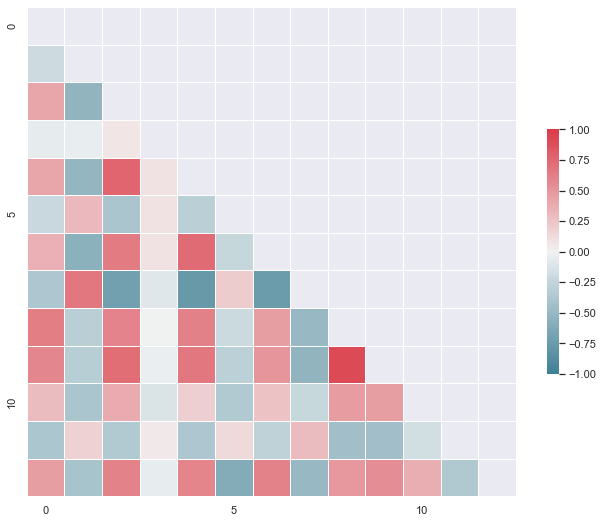

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
1,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
2,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
3,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
4,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
5,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
6,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
7,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
8,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676
9,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993


In [12]:
sns.set(style="darkgrid")

corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1,
            square=True, xticklabels=5, yticklabels=5,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)
plt.show()
corr